# Testing of Autoreject as a Pre/Post Processing Pipeline

In [1]:
# comment if you don't have nb_black installed
%load_ext lab_black

In [2]:
import autoreject

import numpy as np
import scipy
import scipy.io
import pandas as pd
from pathlib import Path
import os
import collections
from natsort import natsorted
import json
import pickle
import warnings

warnings.filterwarnings("ignore")

import mne
from mne import make_fixed_length_epochs

mne.set_log_level("ERROR")
from mne_bids import BIDSPath, get_entities_from_fname, get_entity_vals, read_raw_bids
from autoreject import AutoReject

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

# Define Data Directories

In [3]:
jhroot = Path("/Users/adam2392/Johns Hopkins/Scalp EEG JHH - Documents/bids/")
jeffroot = Path("/Users/adam2392/Johns Hopkins/Jefferson_Scalp - Documents/root/")

# not ready yet
upmcroot = Path("/Users/adam2392/Johns Hopkins/UPMC_Scalp - Documents/")

In [4]:
root = Path("D:/OneDriveParent/OneDrive - Johns Hopkins/Shared Documents/bids")
root = Path("/Users/adam2392/Johns Hopkins/Scalp EEG JHH - Documents/bids/")
deriv_root = root / "derivatives" / "ICA" / "1-30Hz-30" / "win-20"
source_root = root / "sourcedata"


reference = "monopolar"

In [5]:
bids_path = BIDSPath(
    subject="jhh001",
    extension=".edf",
    root=deriv_root,
)

bids_paths = bids_path.match()

# Read in Data and Run Autoreject

In [16]:
raw = read_raw_bids(bids_paths[0])

raw.set_montage("standard_1020")

# make these into epochs
epochs = make_fixed_length_epochs(raw, duration=20)

print(raw)
print(epochs)

epochs.load_data()

<RawEDF | sub-jhh001_run-01_eeg.edf, 19 x 196200 (981.0 s), ~33 kB, data not loaded>
<Epochs |  49 events (good & bad), 0 - 19.995 sec, baseline off, ~33 kB, data not loaded,
 '1': 49>


Number of events,49
Events,1: 49
Time range,0.000 – 19.995 sec
Baseline,off


In [17]:
# make these into epochs
epochs = make_fixed_length_epochs(raw, duration=5)

print(raw)
print(epochs)

epochs.load_data()

<RawEDF | sub-jhh001_run-01_eeg.edf, 19 x 196200 (981.0 s), ~33 kB, data not loaded>
<Epochs |  196 events (good & bad), 0 - 4.995 sec, baseline off, ~33 kB, data not loaded,
 '1': 196>


Number of events,196
Events,1: 196
Time range,0.000 – 4.995 sec
Baseline,off


In [18]:
ar = AutoReject(n_interpolate=[0])
ar.fit(epochs)
_, reject_log = ar.transform(epochs, return_log=True)

Running autoreject on ch_type=eeg




Estimated consensus=0.60 and n_interpolate=0


In [9]:
print(reject_log.bad_epochs)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]


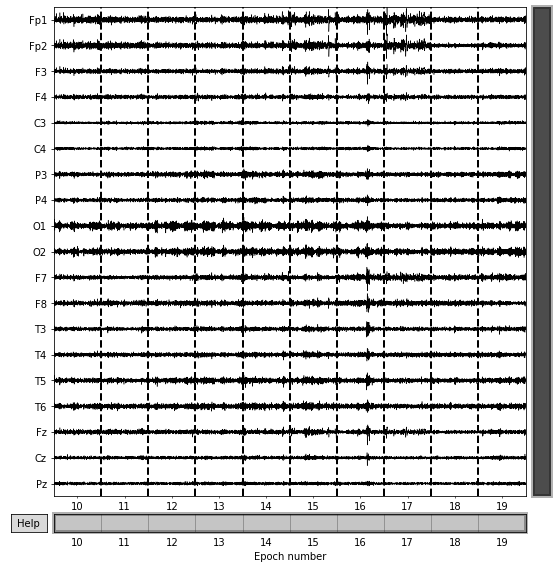

done


In [10]:
epochs[10:20].plot(scalings=dict(eeg=100e-6))
print("done")

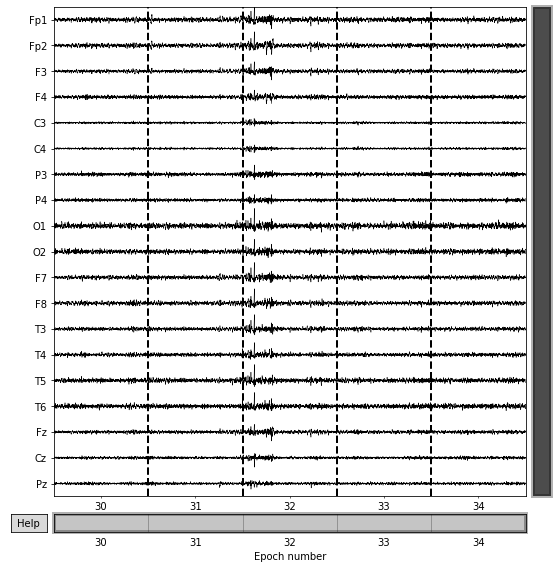

done


In [11]:
epochs[30:35].plot(scalings=dict(eeg=100e-6))
print("done")

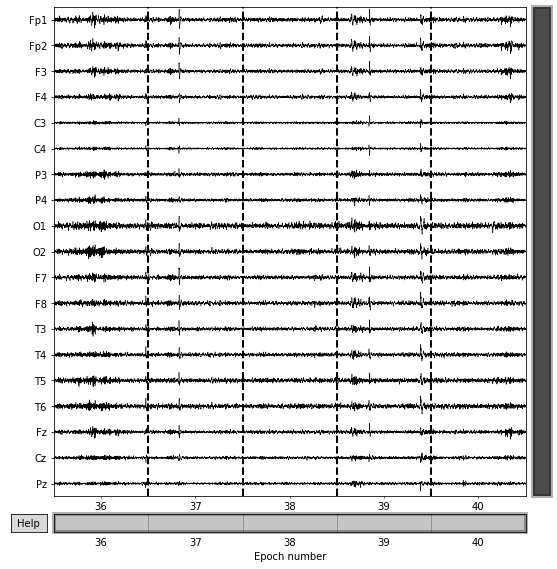

done


In [13]:
epochs[36:41].plot(scalings=dict(eeg=100e-6))
print("done")

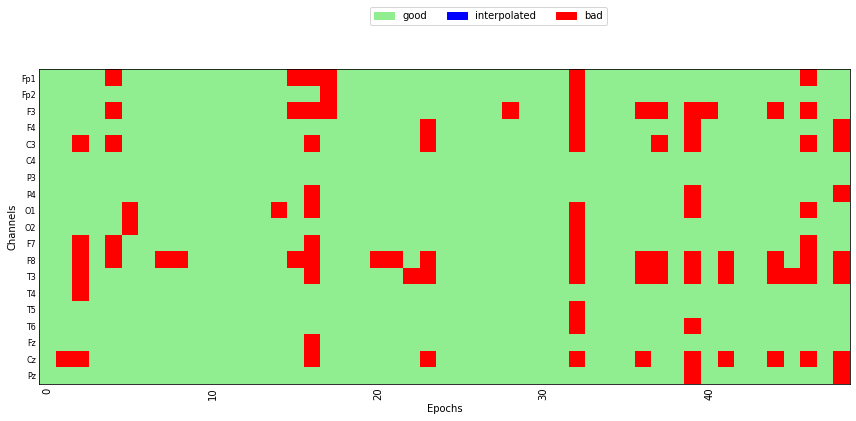

done


In [12]:
reject_log.plot("horizontal", show=True)
print("done")